# Stock Return Distribution Analysis



In [34]:
!pip install yfinance
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install statsmodels


  Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl (9.7 MB)


In [35]:
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")


/var/folders/rj/fph81n416mb0lldd6qnfpttr0000gn/T/ipykernel_72428/877468561.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [36]:
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [37]:
data.columns = [col[0] for col in data.columns]
print(data.columns)



Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [38]:
data['Return'] = data['Close'].pct_change()
data = data.dropna()





In [39]:
print(data['Return'].describe())

from scipy.stats import skew, kurtosis
print("Skewness:", skew(data['Return']))
print("Kurtosis:", kurtosis(data['Return']))


count    1005.000000
mean        0.001187
std         0.021146
min        -0.128647
25%        -0.009127
50%         0.000988
75%         0.012743
max         0.119808
Name: Return, dtype: float64
Skewness: 0.07645028762625501
Kurtosis: 4.850979165854224


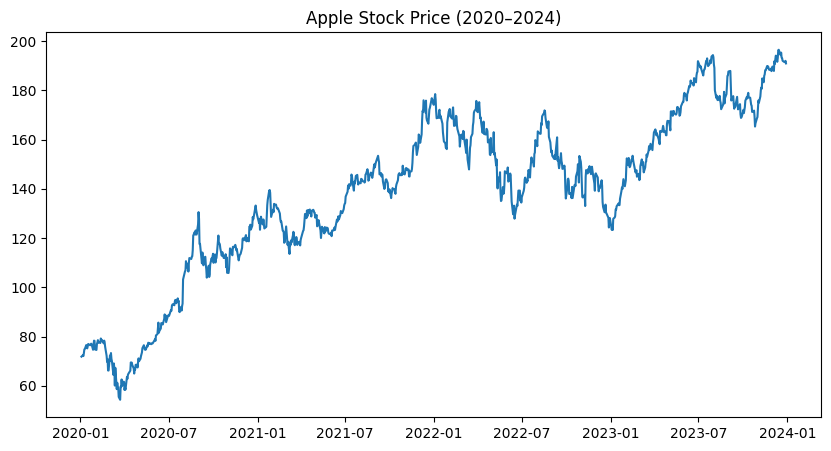

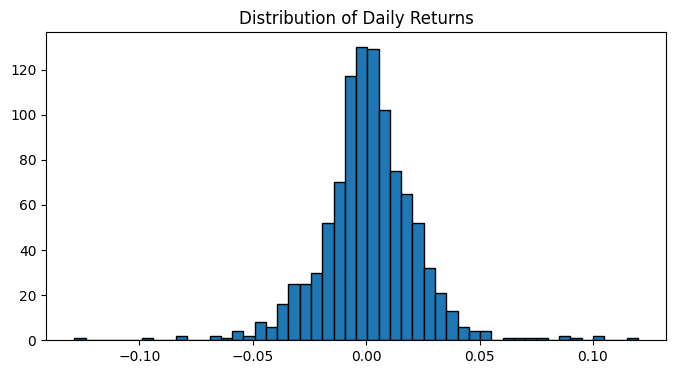

In [40]:
import matplotlib.pyplot as plt

# Price chart
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Apple Stock Price (2020–2024)")
plt.show()

# Returns histogram
plt.figure(figsize=(8,4))
plt.hist(data['Return'], bins=50, edgecolor='k')
plt.title("Distribution of Daily Returns")
plt.show()


In [41]:
from scipy.stats import shapiro, normaltest

stat, p = shapiro(data['Return'])
print("Shapiro-Wilk p-value:", p)

stat2, p2 = normaltest(data['Return'])
print("D’Agostino’s K² Test p-value:", p2)


Shapiro-Wilk p-value: 9.248920476821162e-19
D’Agostino’s K² Test p-value: 5.723667380297341e-26


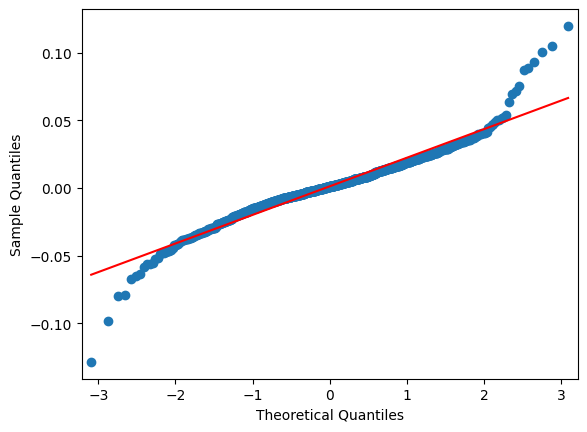

In [42]:
import statsmodels.api as sm
sm.qqplot(data['Return'], line='s')
plt.show()

